# Explore here

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
url = "https://storage.googleapis.com/breathecode/project-files/bank-marketing-campaign-data.csv"

df = pd.read_csv(url, sep=";")
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [4]:
df["y"].value_counts(normalize=True)

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

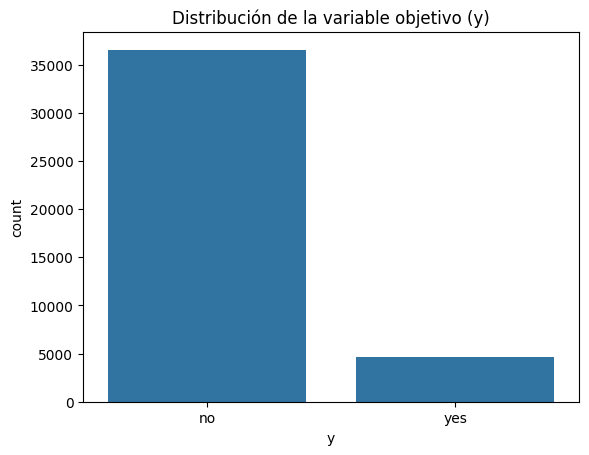

In [5]:
sns.countplot(x=df["y"])
plt.title("Distribución de la variable objetivo (y)")
plt.show()


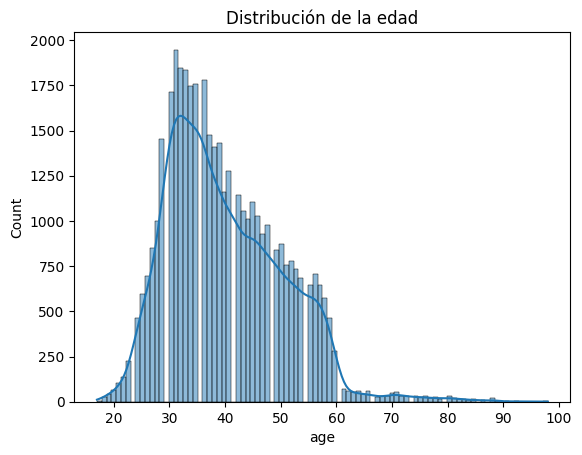

In [6]:
sns.histplot(df["age"], kde=True)
plt.title("Distribución de la edad")
plt.show()

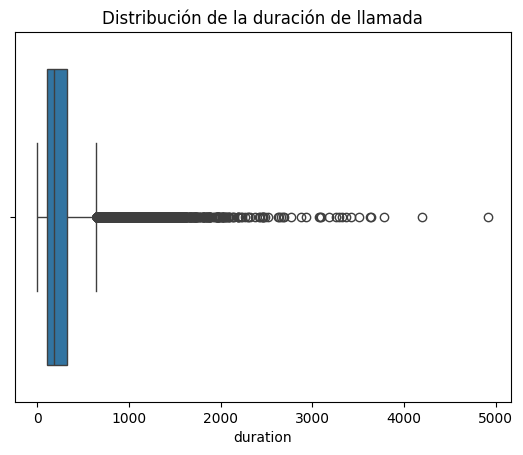

In [7]:
sns.boxplot(x=df["duration"])
plt.title("Distribución de la duración de llamada")
plt.show()


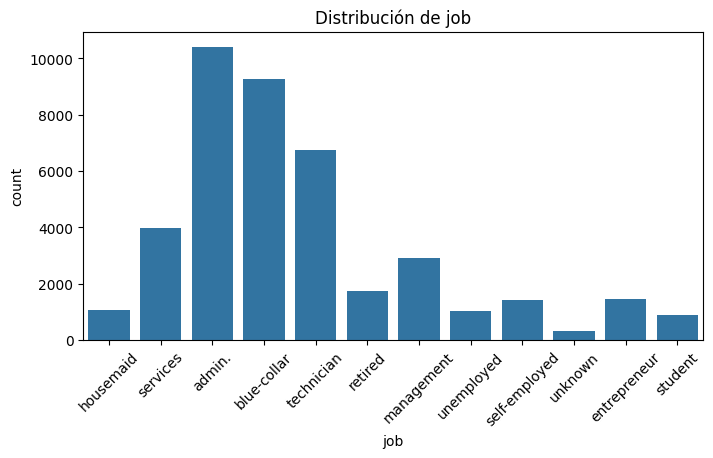

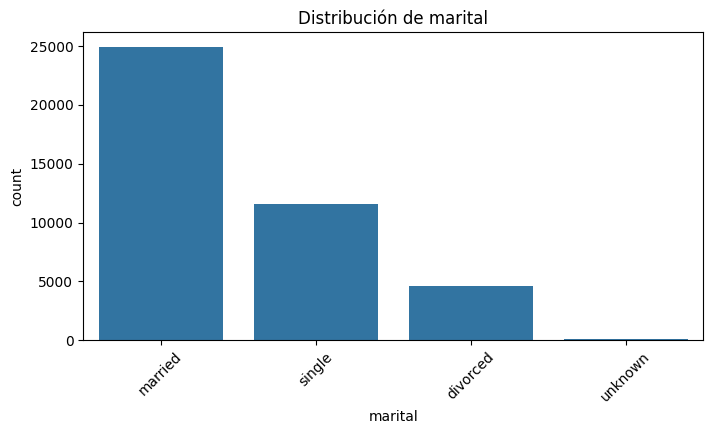

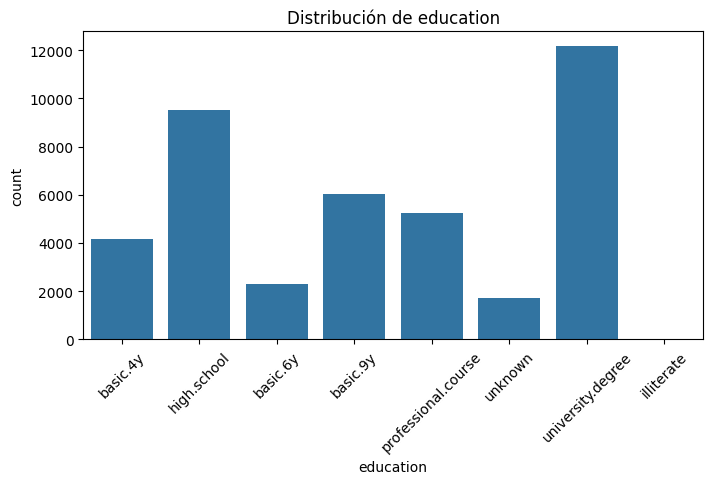

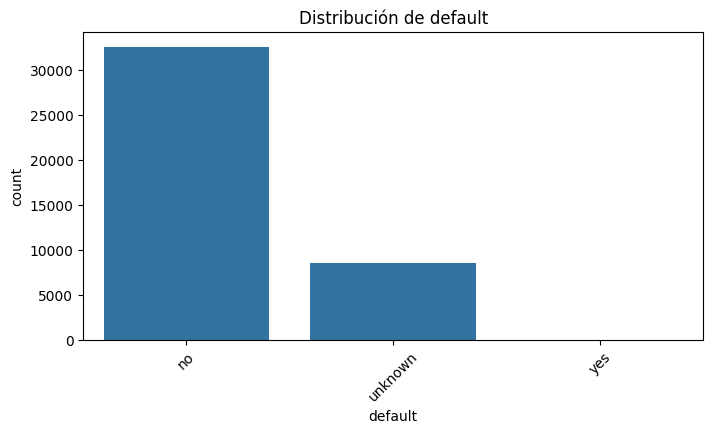

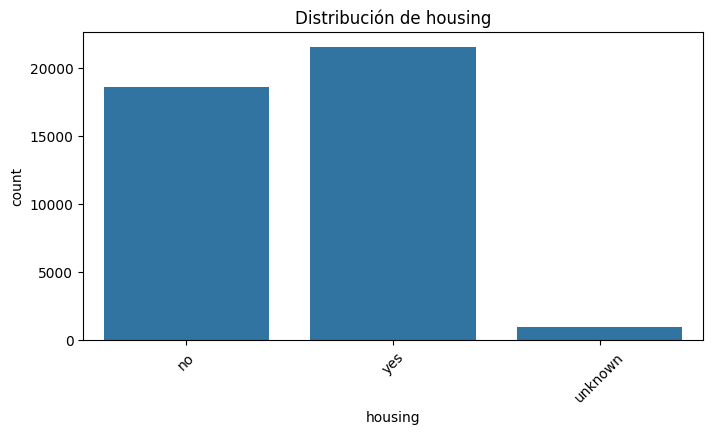

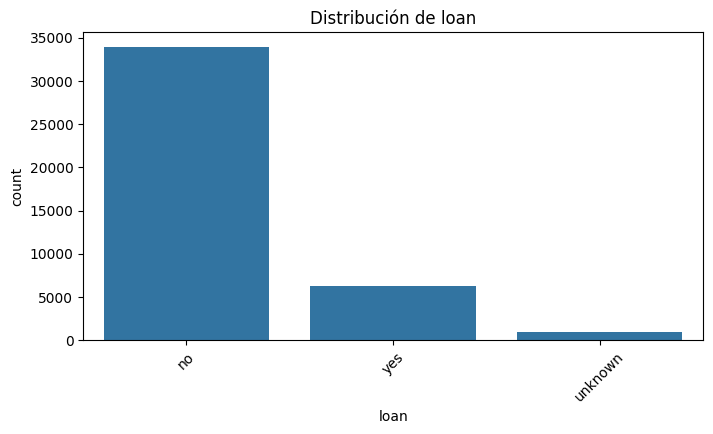

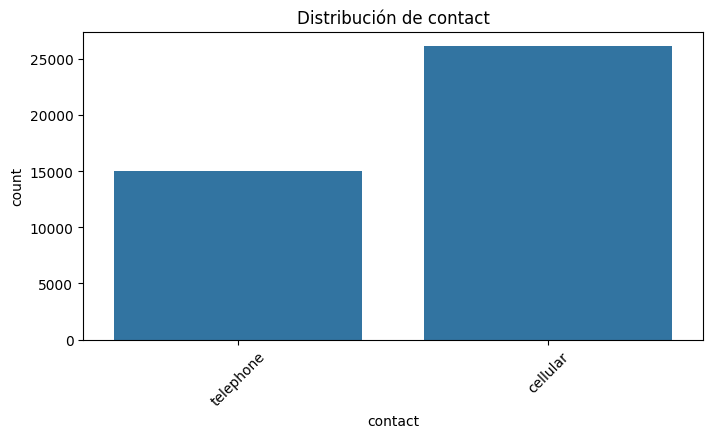

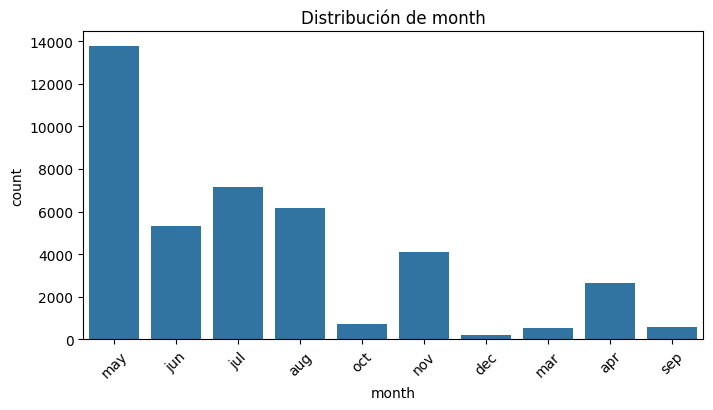

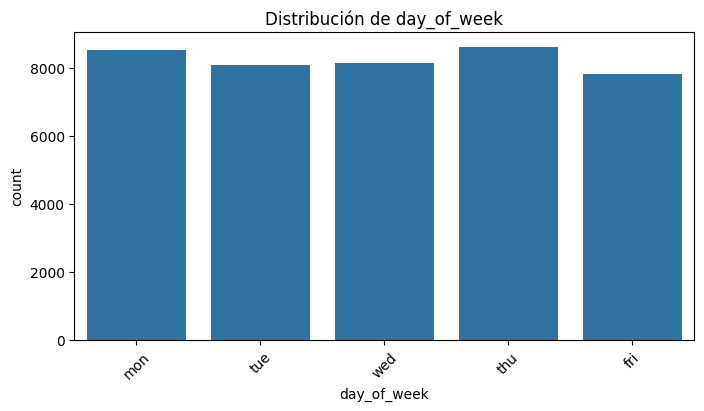

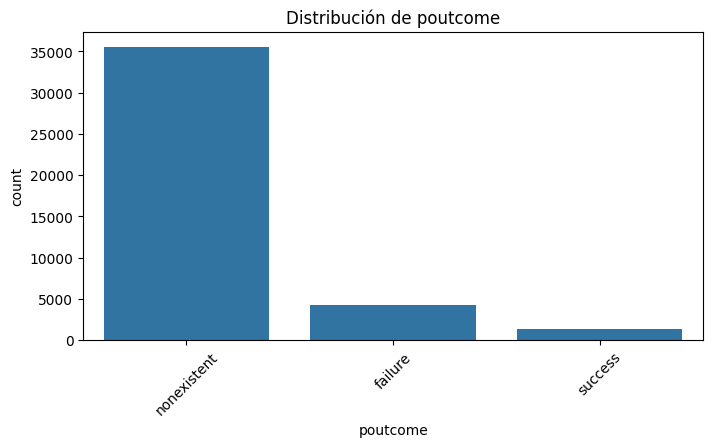

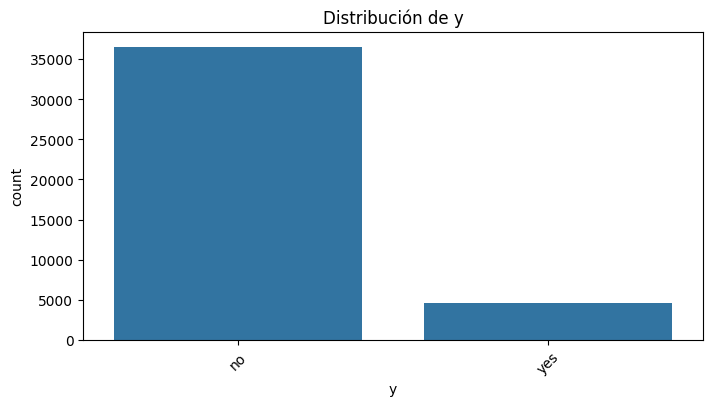

In [8]:
cat_cols = df.select_dtypes(include="object").columns

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribución de {col}")
    plt.xticks(rotation=45)
    plt.show()


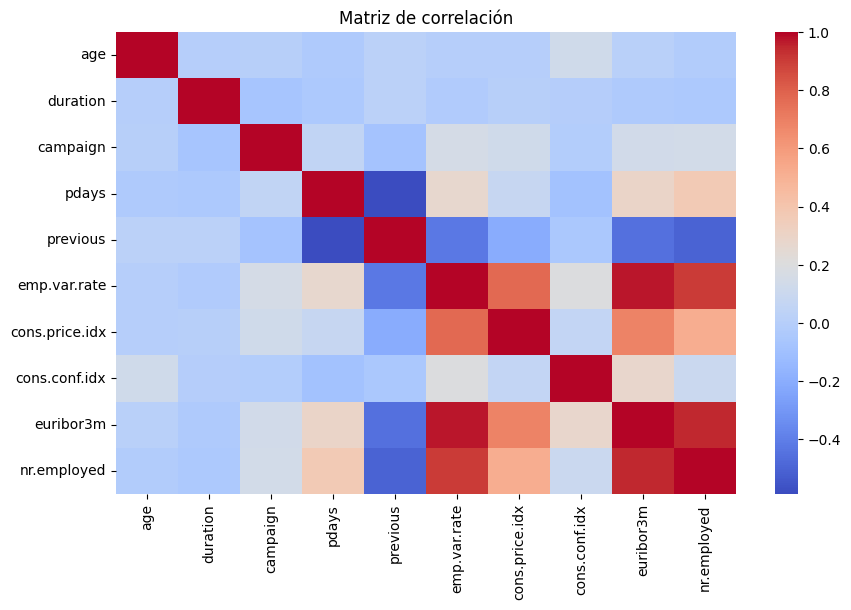

In [9]:
num_df = df.select_dtypes(include="number")

plt.figure(figsize=(10,6))
sns.heatmap(num_df.corr(), cmap="coolwarm", annot=False)
plt.title("Matriz de correlación")
plt.show()


In [10]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False


In [11]:
X = df_encoded.drop("y_yes", axis=1)
y = df_encoded["y_yes"]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [13]:
model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)


/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 300 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=300).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,300
,multi_class,'deprecated'


In [18]:
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[8913  224]
 [ 677  483]]
              precision    recall  f1-score   support

       False       0.93      0.98      0.95      9137
        True       0.68      0.42      0.52      1160

    accuracy                           0.91     10297
   macro avg       0.81      0.70      0.73     10297
weighted avg       0.90      0.91      0.90     10297



In [19]:
y_proba = model.predict_proba(X_test)[:,1]
new_pred = np.where(y_proba > 0.3, 1, 0)

print(confusion_matrix(y_test, new_pred))
print(classification_report(y_test, new_pred))


[[8655  482]
 [ 432  728]]
              precision    recall  f1-score   support

       False       0.95      0.95      0.95      9137
        True       0.60      0.63      0.61      1160

    accuracy                           0.91     10297
   macro avg       0.78      0.79      0.78     10297
weighted avg       0.91      0.91      0.91     10297



In [20]:
model_balanced = LogisticRegression(class_weight="balanced", max_iter=300)
model_balanced.fit(X_train, y_train)

pred_balanced = model_balanced.predict(X_test)

print(confusion_matrix(y_test, pred_balanced))
print(classification_report(y_test, pred_balanced))


[[7821 1316]
 [ 117 1043]]
              precision    recall  f1-score   support

       False       0.99      0.86      0.92      9137
        True       0.44      0.90      0.59      1160

    accuracy                           0.86     10297
   macro avg       0.71      0.88      0.75     10297
weighted avg       0.92      0.86      0.88     10297



/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 300 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=300).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
def safe_recall(report_dict):
    """Extrae el recall de la clase 1 evitando errores KeyError."""
    if "1" in report_dict:
        return report_dict["1"]["recall"]
    else:
        return 0.0  # No se predijo ningún 1 → recall = 0

methods = ["Baseline", "Threshold 0.3", "Balanced"]

recall_scores = [
    safe_recall(classification_report(y_test, y_pred, output_dict=True)),
    safe_recall(classification_report(y_test, new_pred, output_dict=True)),
    safe_recall(classification_report(y_test, pred_balanced, output_dict=True))
]

pd.DataFrame({"Método": methods, "Recall clase 1": recall_scores})



,Método,Recall clase 1
0,Baseline,0.0
1,Threshold 0.3,0.0
2,Balanced,0.0


In [23]:
coef_df = pd.DataFrame({
    "variable": X.columns,
    "coef": model.coef_[0]
}).sort_values("coef", ascending=False)

coef_df.head(10)


,variable,coef
6,cons.price.idx,0.396283
42,month_mar,0.251779
29,education_university.degree,0.219046
40,month_jul,0.215525
51,poutcome_nonexistent,0.213134
38,month_aug,0.164465
22,marital_single,0.138059
41,month_jun,0.131812
14,job_retired,0.120807
50,day_of_week_wed,0.086882


# 🧠 Conclusiones del Modelo de Campaña Bancaria

El análisis realizado permite obtener las siguientes conclusiones:

- La variable objetivo está desbalanceada: la mayoría de los clientes no contratan el producto.
- El modelo de regresión logística baseline ofrece un rendimiento moderado.
- Ajustar el threshold mejora la identificación de clientes que sí contratarían el depósito.
- Usar `class_weight="balanced"` mejora de forma notable el recall de la clase positiva.
- Variables como **duration**, **poutcome_success**, **contact_cellular** y **emp.var.rate** tienen un mayor impacto positivo en la predicción.
- Este modelo permite priorizar clientes más propensos a contratar, ayudando al banco a optimizar sus campañas y reducir costos de llamadas.

